In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,precision_score, recall_score, roc_auc_score


Exploratory Data Analysis(EDA)

In [ ]:
df=pd.read_csv('Insurance.csv') #loading dataset

In [ ]:
print("Dataset Information")
print(df.info()) #to display basic information of the dataset

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes:

In [ ]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [ ]:
from IPython.display import display
print('Summary Statistics') #Display summary statistics
display(df.describe().iloc[:,1:])

Summary Statistics


,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


check for NULL values

In [ ]:
for column in df.columns:
  null_values=df[column].isnull()
  print(f"Number of null values in '{column}' column: {null_values.sum()}")

Number of null values in 'ID' column: 0
Number of null values in 'City_Code' column: 0
Number of null values in 'Region_Code' column: 0
Number of null values in 'Accomodation_Type' column: 0
Number of null values in 'Reco_Insurance_Type' column: 0
Number of null values in 'Upper_Age' column: 0
Number of null values in 'Lower_Age' column: 0
Number of null values in 'Is_Spouse' column: 0
Number of null values in 'Health Indicator' column: 11691
Number of null values in 'Holding_Policy_Duration' column: 20251
Number of null values in 'Holding_Policy_Type' column: 20251
Number of null values in 'Reco_Policy_Cat' column: 0
Number of null values in 'Reco_Policy_Premium' column: 0
Number of null values in 'Response' column: 0


Drop rows with extra columns

In [ ]:
ogRows=df.shape[0]
df=df.dropna(axis=0) #dropping rows with missing data

In [ ]:
print(f"No of rows dropped={ogRows-df.shape[0]}")

No of rows dropped=27334


Heatmap to show correlation

<ipython-input-65-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

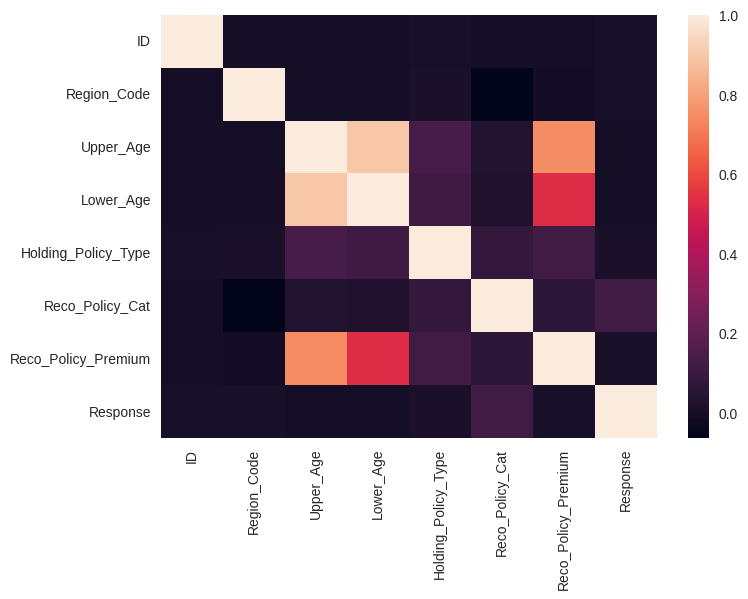

In [ ]:
sns.heatmap(df.corr())

Drop columns with high correlation

In [ ]:
originalData=df.copy()
df=df.drop(columns=['Lower_Age'])

In [ ]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
3,4,C24,4378,Owned,Joint,52,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,No,X2,3,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,No,X2,5,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,Yes,X4,9,4.0,17,29344.0,1


HISTOGRAM OF EACH FEATURES IN THE DATASET

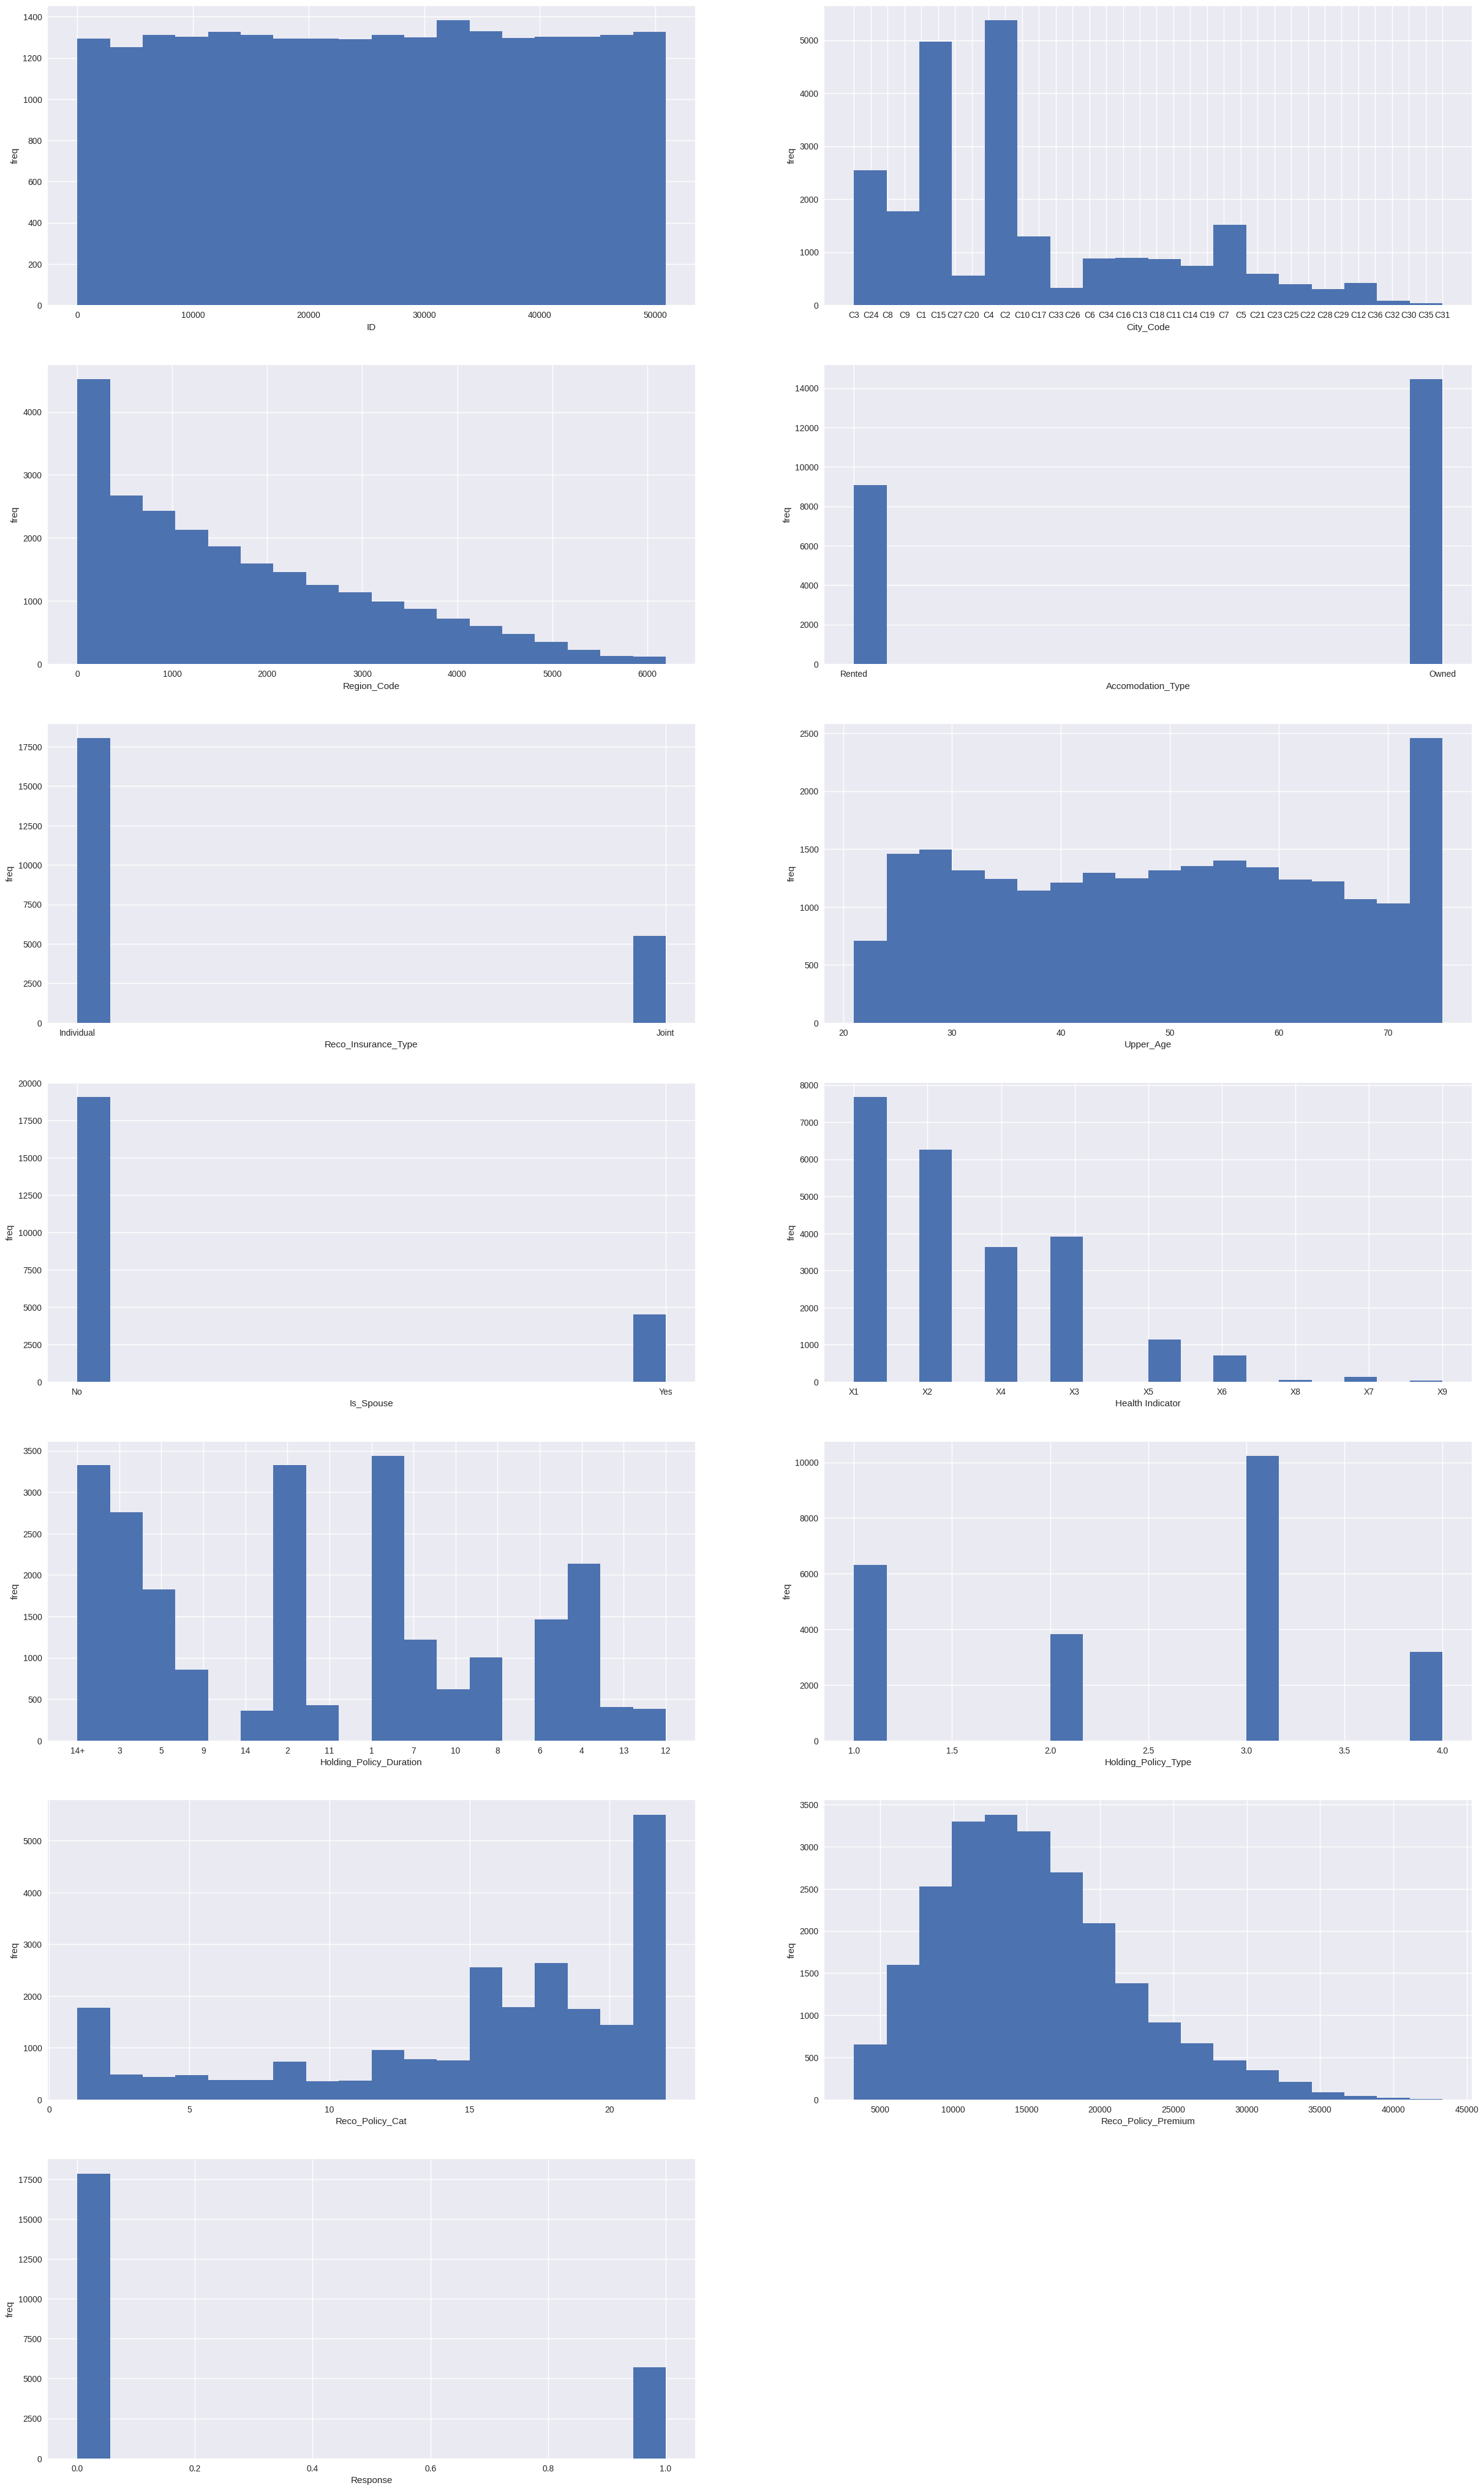

In [ ]:
plt.figure(figsize=(30, 52))
for i in range(0, len(df.columns)):
    xax = df[df.columns[i]].values #
    plt.subplot(7, 2, i+1)
    plt.hist(xax, bins=18)
    plt.xlabel(df.columns[i])
    plt.ylabel('freq')

Preperation of Data

In [ ]:
X_values=df.iloc[:,:-1].values
Y_values=df.iloc[:,-1].values

Convert categorical labels into numerical value

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
labelEncoder=LabelEncoder()
allColumns=df.columns

In [ ]:
X_values[:, allColumns.get_loc('City_Code')] = labelEncoder.fit_transform(X_values[:, allColumns.get_loc('City_Code')])
X_values[:, allColumns.get_loc('Accomodation_Type')] = labelEncoder.fit_transform(X_values[:, allColumns.get_loc('Accomodation_Type')])
X_values[:, allColumns.get_loc('Reco_Insurance_Type')] = labelEncoder.fit_transform(X_values[:, allColumns.get_loc('Reco_Insurance_Type')])
X_values[:, allColumns.get_loc('Health Indicator')] = labelEncoder.fit_transform(X_values[:, allColumns.get_loc('Health Indicator')])
X_values[:, allColumns.get_loc('Is_Spouse')] = labelEncoder.fit_transform(X_values[:, allColumns.get_loc('Is_Spouse')])
X_values[X_values=='14+']='14'

Splitting the dataset into testing and training

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_values, Y_values, test_size = 0.25, random_state=1)

Scaling of Features(to ensure all features have the same scale)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

CLASSIFICATION USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
# Create a random forest classifier
knn_classifier = KNN(n_neighbors = 14, metric = 'minkowski', p=2)

# Fit the model on the training data
knn_classifier.fit(train_x, train_y)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(test_x)

# Evaluate the model
accuracy_knn = accuracy_score(test_y, y_pred_knn)
precision_knn = precision_score(test_y, y_pred_knn, pos_label=1)
recall_knn = recall_score(test_y, y_pred_knn, pos_label=1)
conf_matrix_knn = confusion_matrix(test_y, y_pred_knn)
classification_report_knn = classification_report(test_y, y_pred_knn)

print("\nKNN Classifier Results:")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("------------------------------------------------------")
print("Classification Report:")
print(classification_report_knn)


KNN Classifier Results:
------------------------------------------------------
Accuracy: 0.7518
Confusion Matrix:
[[4409   47]
 [1414   17]]
------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4456
           1       0.27      0.01      0.02      1431

    accuracy                           0.75      5887
   macro avg       0.51      0.50      0.44      5887
weighted avg       0.64      0.75      0.65      5887



CLASSIFICATION USING QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
qdaClassifier=qda(store_covariance=True)
qdaClassifier.fit(train_x,train_y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
#Predict the test set results
predictionsQDA=qdaClassifier.predict(test_x)
accuracy_qda=qdaClassifier.score(test_x,test_y)

confusionMatrixQDA=confusion_matrix(test_y,predictionsQDA)
classification_report_qda=classification_report(test_y, predictionsQDA)

In [ ]:
print("\nQDA Classifier Results:")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy_qda:.4f}")
print("Confusion Matrix:")
print(confusionMatrixQDA)
print("------------------------------------------------------")
print("Classification Report:")
print(classification_report_qda)


QDA Classifier Results:
------------------------------------------------------
Accuracy: 0.7437
Confusion Matrix:
[[4316  140]
 [1369   62]]
------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      4456
           1       0.31      0.04      0.08      1431

    accuracy                           0.74      5887
   macro avg       0.53      0.51      0.46      5887
weighted avg       0.65      0.74      0.66      5887



ROC and AUC curve

PLOTTING ROC and AUC

In [ ]:
fprKNN,tprKNN,threshold1=roc_curve(test_y,knn_classifier.predict_proba(test_x)[:, 1])
roc_auc_knn = auc(fprKNN,tprKNN)

fprQDA,tprQDA,threshold2=roc_curve(test_y,qdaClassifier.predict_proba(test_x)[:, 1])
roc_auc_qda = auc(fprQDA, tprQDA)

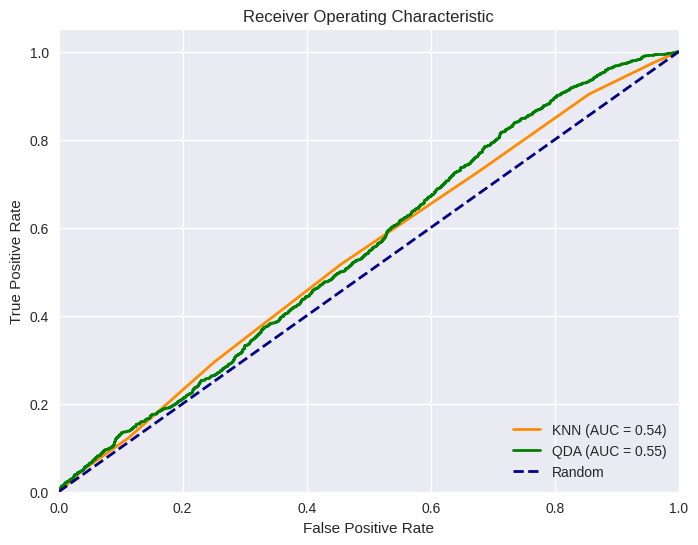

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprKNN, tprKNN, color='darkorange', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fprQDA, tprQDA, color='green', lw=2, label='QDA (AUC = {:.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()